 ### Assignment 4: CLASSIFICATION - Decision Trees.


### Objective:
To build the Decision Tree model that predicts the signs_of_mental_illness of the victim from the Fatal Police Shooting Data and regularize the model and compare the performance.

### Fatal Police Shooting Data

### Objective:
To build the Decision Tree model that predicts the signs_of_mental_illness of the victim from the Fatal Police Shooting Data and regularize the model and compare the performance.

**About dataset**\
The dataset consists following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting 
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. 
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

### Import all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import copy
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
# For Visualizing plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Let's import the data

In [2]:
police = pd.read_csv("fatal-police-shootings-data.csv")
police.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

### Let's Understand the data

In [3]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4478 non-null   int64  
 1   name                     4478 non-null   object 
 2   date                     4478 non-null   object 
 3   manner_of_death          4478 non-null   object 
 4   armed                    4230 non-null   object 
 5   age                      4309 non-null   float64
 6   gender                   4473 non-null   object 
 7   race                     4105 non-null   object 
 8   city                     4478 non-null   object 
 9   state                    4478 non-null   object 
 10  signs_of_mental_illness  4478 non-null   bool   
 11  threat_level             4478 non-null   object 
 12  flee                     4299 non-null   object 
 13  body_camera              4478 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
police.describe()

id          age
count  4478.000000  4309.000000
mean   2502.721974    36.879322
std    1404.978671    13.067598
min       3.000000     6.000000
25%    1286.250000    27.000000
50%    2505.500000    35.000000
75%    3718.750000    45.000000
max    4927.000000    91.000000

In [5]:
police.describe(include='object').T

count unique          top  freq
name             4478   4332        TK TK   129
date             4478   1551   2018-06-29     9
manner_of_death  4478      2         shot  4250
armed            4230     84          gun  2489
gender           4473      2            M  4265
race             4105      6            W  2059
city             4478   2168      Phoenix    68
state            4478     51           CA   680
threat_level     4478      3       attack  2829
flee             4299      4  Not fleeing  2868

### Question 1: 1 Mark
**Display the percentage of missing values present in each column of the data and round it off to 2 decimal place.**

In [6]:
round(police.isnull().sum() / police.count() * 100, 2)
# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill appropriate method for finding missing values along with functions such as sum or count to calculate percentage
# 2. '<<__B__>>' --> Fill appropriate method for finding missing values along with functions such as sum or count to calculate percentage

id                         0.00
name                       0.00
date                       0.00
manner_of_death            0.00
armed                      5.86
age                        3.92
gender                     0.11
race                       9.09
city                       0.00
state                      0.00
signs_of_mental_illness    0.00
threat_level               0.00
flee                       4.16
body_camera                0.00
dtype: float64

In [7]:
# So,how many total missing values do we have?
total_cells = np.product(police.shape)
total_missing = police.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.5536272570662923


### Let's clean the data

In [8]:
# Since we observe only 1.6% of null or missing values, let's drop those missing values.

# Remove all the rows that contain missing value
police = police.dropna()

In [9]:
police.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [10]:
# Drop redundant or not so useful columns for model building
police = police.drop(['id','date','city','name','state'], axis=1)

In [11]:
# We take a copy of our source data.
df = copy.deepcopy(police)
df.head()


manner_of_death       armed   age gender race  signs_of_mental_illness  \
0              shot         gun  53.0      M    A                     True   
1              shot         gun  47.0      M    W                    False   
2  shot and Tasered     unarmed  23.0      M    H                    False   
3              shot  toy weapon  32.0      M    W                     True   
4              shot    nail gun  39.0      M    H                    False   

  threat_level         flee  body_camera  
0       attack  Not fleeing        False  
1       attack  Not fleeing        False  
2        other  Not fleeing        False  
3       attack  Not fleeing        False  
4       attack  Not fleeing        False

### Encoding

### Question 2: 1 Mark

- convert the body_camera column to binary numbers. False = 0 and True = 1. Convert it's datatype to int.
- convert the gender column to binary numbers. Male = 1 and Female = 0. Convert it's datatype to int.
- convert the signs_of_mental_illness column to binary numbers. False = 0 and True = 1. Convert it's datatype to int.
- convert the manner_of_death column to binary numbers. shot = 0 and shot and Tasered = 1. Convert it's datatype to int.

In [12]:
le = preprocessing.LabelEncoder()    # using label encoder class in the object le, 
                                      # convert the following values of these attributes to integer datattype values

# use appropriate methods from LabelEncoder class to transform the following into into binary nos

df["body_camera"]= le.fit_transform(df["body_camera"])
df["gender"]= le.fit_transform(df["gender"])
df["signs_of_mental_illness"]= le.fit_transform(df["signs_of_mental_illness"])
df["manner_of_death"]= le.fit_transform(df['manner_of_death'])


df['manner_of_death'] = df['manner_of_death'].astype('int')

# convert the following into int datatype

df['gender'] = df['gender'].astype(int)
df['signs_of_mental_illness'] = df['signs_of_mental_illness'].astype(int)
df['body_camera'] = df['body_camera'].astype(int)

# TODO: Code to fill: 

# 1. '<<__A__>>' --> use appropriate method for encoding
# 2. '<<__B__>>' --> use appropriate method for encoding
# 3. '<<__C__>>' --> use appropriate method for encoding
# 4. '<<__D__>>' --> use appropriate method for encoding
# 5. '<<__E__>>' --> use appropriate method for converting to 'int' datatype
# 6. '<<__F__>>' --> use appropriate method for converting to 'int' datatype
# 7. '<<__G__>>' --> use appropriate method for converting to 'int' datatype

In [13]:
df.head()

manner_of_death       armed   age  gender race  signs_of_mental_illness  \
0                0         gun  53.0       1    A                        1   
1                0         gun  47.0       1    W                        0   
2                1     unarmed  23.0       1    H                        0   
3                0  toy weapon  32.0       1    W                        1   
4                0    nail gun  39.0       1    H                        0   

  threat_level         flee  body_camera  
0       attack  Not fleeing            0  
1       attack  Not fleeing            0  
2        other  Not fleeing            0  
3       attack  Not fleeing            0  
4       attack  Not fleeing            0

In [14]:
# Decision tree in Python can take only numerical / categorical columns. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.


for column in df.columns: # Loop through all columns in the dataframe
    if df[column].dtype == 'object': # Only apply for columns with categorical strings
        df[column] = pd.Categorical(df[column]).codes # Replace strings with an integer

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill appropriate name for iterating over columns
# 2. '<<__B__>>' --> Fill appropriate feature 
# 3. '<<__C__>>' --> Fill appropriate feature

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3663 entries, 0 to 4477
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          3663 non-null   int64  
 1   armed                    3663 non-null   int8   
 2   age                      3663 non-null   float64
 3   gender                   3663 non-null   int64  
 4   race                     3663 non-null   int8   
 5   signs_of_mental_illness  3663 non-null   int64  
 6   threat_level             3663 non-null   int8   
 7   flee                     3663 non-null   int8   
 8   body_camera              3663 non-null   int64  
dtypes: float64(1), int64(4), int8(4)
memory usage: 186.0 KB


In [16]:
df.head()

manner_of_death  armed   age  gender  race  signs_of_mental_illness  \
0                0     30  53.0       1     0                        1   
1                0     30  47.0       1     5                        0   
2                1     75  23.0       1     2                        0   
3                0     74  32.0       1     5                        1   
4                0     53  39.0       1     2                        0   

   threat_level  flee  body_camera  
0             0     2            0  
1             0     2            0  
2             1     2            0  
3             0     2            0  
4             0     2            0

### Let's build our models

**We are going to build a Decision Tree model. In this model we are going to predict signs_of_mental_illness.**

### Question 3: 1 Mark

**Split the Independent and Dependent attributes seperately from the given datset and save those in X and y variables respectively.**

In [17]:
X = df.drop(columns=['signs_of_mental_illness'],axis=1) # Independent attributes
y = df['signs_of_mental_illness']  # Dependent attribute


# TODO: Code to fill: 

# 1. '<<__A__>>' --> write code to extract only Independent attributes here and save them in X variable
# 2. '<<__B__>>' --> write code to extract only Dependent attribute here and save them in y variable

In [18]:
train_char_label = ['No', 'Yes']

### Question 4: 1 Mark
Split the data into train and test, with a train, test ratio of 80:20

In [19]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=7)

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill approprite code to split the X and y into train and test


### Question 5: 1 Mark
**Build a decision tree model using appropriate  class from sklearn library and fit that model on train data.**

In [20]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' ) 
dt_model.fit(x_train, y_train) 

# TODO: Code to fill: 

# 1. '<<__A__>>' --> build a decision tree model using approriate class from sklearn library
# 2. '<<__B__>>' --> Fit your training data here

DecisionTreeClassifier(criterion='entropy')

### Question 6: 1 Mark
**Predict the above built model on test data.**

In [21]:
y_predict = dt_model.predict(x_test)

# TODO: Code to fill: 

# 1. '<<__A__>>' -->  from the built decision tree model predict your test data 

In [22]:
print(dt_model.score(x_train , y_train))
print(dt_model.score(x_test , y_test))

0.9023890784982935
0.6725784447476125


### Question 7: 1 Mark
**Print confusion matrix of test data**

In [23]:
print(metrics.confusion_matrix(y_test,y_predict)) # display a confusion matrix of test data using approriate class from sklearn library

# TODO: Code to fill: 

# 1. '<<__A__>>' -->  fill appropriate code to print confusion matrix
# 2. '<<__B__>>' -->  fill appropriate code to print confusion matrix
# 3. '<<__C__>>' -->  fill appropriate code to print confusion matrix

[[439  92]
 [148  54]]


In [24]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

decision_tree = open('decision_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= decision_tree , feature_names = list(x_train), class_names = list(train_char_label))

decision_tree.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                      Imp
manner_of_death  0.035417
armed            0.176048
age              0.484823
gender           0.030830
race             0.075365
threat_level     0.072599
flee             0.084917
body_camera      0.040001


In [25]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng decision_tree.dot -o decision_tree.png")
Image("decision_tree.png")

**We can see that tree is overgrown**

## Regularising (pruning) the Decision Tree

### Question 8: 1 Mark
**Build a pruned decision tree classifier model with criterion=entropy, max_depth=6, min_samples_split=3, min_samples_leaf=1 and fit it on train data.**

In [26]:
reg_dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=3, min_samples_leaf=1)
reg_dt_model = reg_dt_model.fit(x_train, y_train)                              

# TODO: Code to fill: 

# 1. '<<__A__>>' -->    Apply all suggested hyperparameters in the question and build a decision tree model
# 2. '<<__B__>>' -->    Fit your train data here

In [27]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

credit_tree_regularized.close()


### Question 9: 1 Mark
**Display the feature importance of all the predictors from regularized or pruned decision tree model.**

In [28]:
 '''Print the feature importances of all the Independendent variables or predictors to know
 which attribute has contibuted most in predition.'''

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                      Imp
manner_of_death  0.009144
armed            0.290928
age              0.143671
gender           0.000000
race             0.136804
threat_level     0.043888
flee             0.346226
body_camera      0.029339


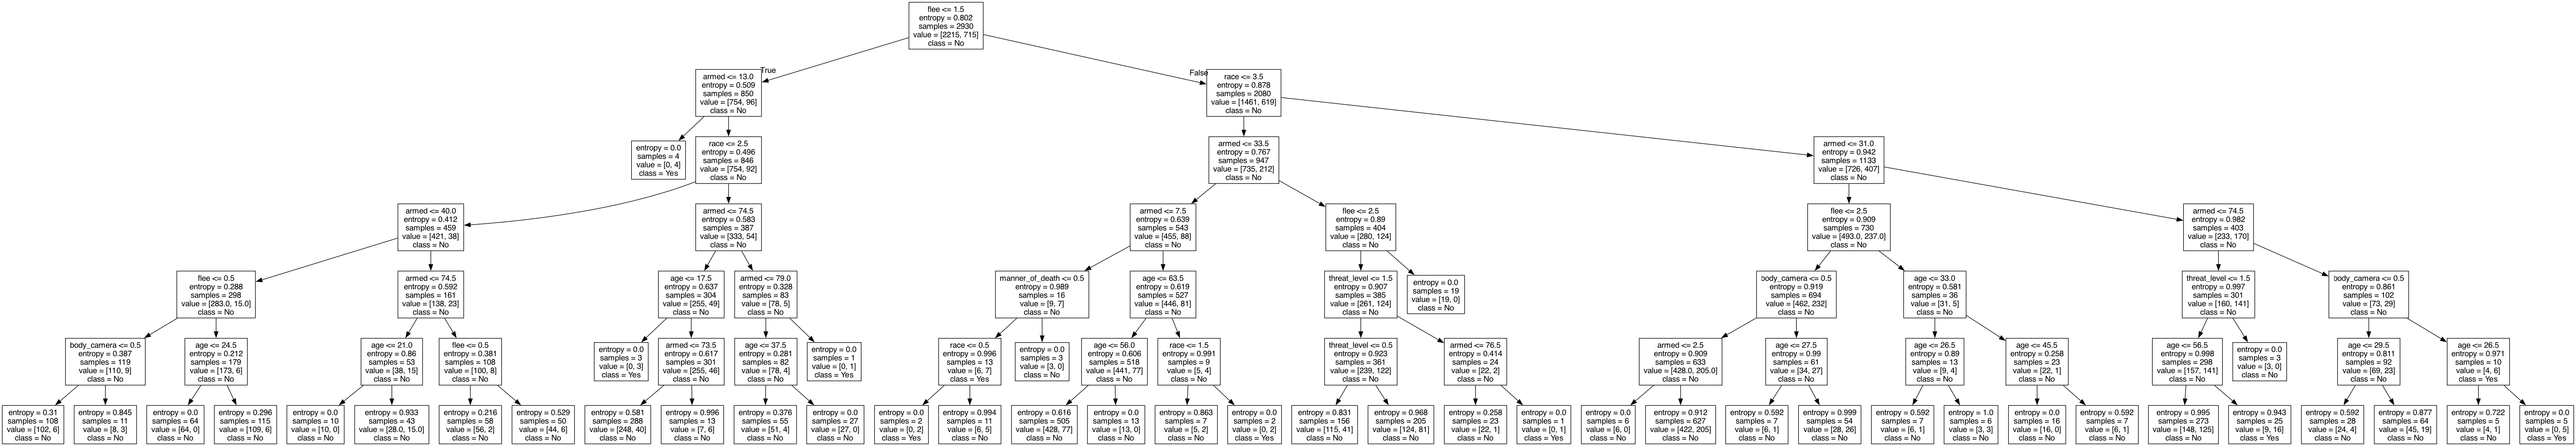

In [29]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng credit_tree_regularized.dot -o credit_tree_regularized.png")
Image("credit_tree_regularized.png")

In [30]:
y_predict = reg_dt_model.predict(x_test)

### Question 10: 1 Mark
**Check the accuracy of both train and test data of regularized decision tree model.**

In [31]:
print(reg_dt_model.score(x_train, y_train)) # display the accuracy of train data using approriate class from sklearn.metrics library
print(reg_dt_model.score(x_test, y_test)) # display the accuracy of test data using approriate class from sklearn.metrics library

# TODO: Code to fill: 

# 1. '<<__A__>>' --> display the accuracy of train data using approriate class from sklearn.metrics library
# 2. '<<__B__>>' --> display the accuracy of test data using approriate class from sklearn.metrics library

0.764505119453925
0.7244201909959073


In [32]:
print(metrics.confusion_matrix(y_test, y_predict))

[[526   5]
 [197   5]]


#### Though accuracy reduced in train, we can observe that model is a good model without overfitting and underfitting. Also accuracy of test data increased.